# Klasifikacija hronične bolesti bubrega

## Atributi

age - godine (numerički podatak)
bp - krvni pritisak (numerički podatak) izražen u mm/Hg
sg -specifična težina urina (nominalna vrednost) 
    vrednosti:(1.005,1.010,1.015,1.020,1.025)
al - albumin - to su krstići za albumine u mokraći koliko ih ima (nominalna)
    vrednosti:(0,1,2,3,4,5)
su -šećer -krstići za šečer (nominalno)
    vrednosti:(0,1,2,3,4,5)
rbc- broj crvenih krvnih zrnaca (nominalno)
    vrednosti:(normalno,abnormalno)
pc- prisustvo gnojnih ćelija (nominalno)
    vrednosti:(normalno,abnormalno)
pcc- gustina gnojnih ćelija (nominalno)
    vrednosti:(normalno,abnormalno)
ba -bakterija (nominalno)
    vrednosti(prisutno,nije prisutno)
bgr- nivo šećera u krvi (numerički podatak) u mgs/dl
bu- nivo krvi u urei (numerički podatak) u mgs/dl
sc- serum kreatinin (numerički podatak) u mgs/dl
sod- natrijum (numerički podatak) u mEq/L
spot- kalijum (numerički podatak) u mEq/L
hemo -hemoglobin (numerički podatal) u gms
pcv -hemokrit (numerički podatak)
wc -broj belih krvnih zrnaca (numerički podatak)
rc - broj crvenih krvnih zrnaca (numerički podatak)
htn - hipertenzija (nominalno)
    vrednost(da,ne)
dm -dijabetes (nominalno)
    vrednost(da,ne)
cad- bolest koronarnih aterija (nominalno)
    vrednost(da,ne)
appet- apetit (nominalno)
    vrednost(dobar,loš)
pe- Edem na ekstremitetima (nominalno)
    vrednost(da,ne)
ane- anemija (nominalno)
    vrednost(da,ne)
class- Ima hroničnu bolest bubrega ili ne

### Napomena 
U datasetu se podaci koji nisu poznati označavaju sa ?
U konsultaciji sa lekarima se došlo do zaključka da ba atribut ne bi trebao biti od velikog značaja, hematokrit treba izbaciti jer će dovoditi do pogrešnih rezulata jer nemamo klasifikaciju po polu a vrednosti za muškarce i žene se značajno razlikuju, takođe broj belih krvnih ćelija treba imati u vidu da možda nije jako bitan

Uključivanje biblioteka

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from  sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import accuracy_score
from  sklearn.metrics import plot_roc_curve
from sklearn.metrics import  *
from  sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

## Priprema podataka 
Ucitavanje podataka

In [2]:
data=pd.read_csv("ckd.csv")
data.columns=['id','age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class']
data=data.drop(columns=['id'])
data.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


Posto su vrednosti koje fale oznacene sa ? moramo to pretvoriti u NaN

In [3]:
data=data.replace(to_replace='?',value=np.nan)
data.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.01,0,0,NaN,normal,notpresent,notpresent,100,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


Dimenzije odnosno velicina naseg dataseta

In [4]:
data.shape

(400, 25)

Imali smo problema kod citanja numerickih vrednosti te smo kategoricki rekli pandasu koje su numericke kolone

In [5]:
data['age']=pd.to_numeric(data['age'],errors='coerce')
data['bp']=pd.to_numeric(data['bp'],errors='coerce')
data['bgr']=pd.to_numeric(data['bgr'],errors='coerce')
data['bu']=pd.to_numeric(data['bu'],errors='coerce')
data['sc']=pd.to_numeric(data['sc'],errors='coerce')
data['sod']=pd.to_numeric(data['sod'],errors='coerce')
data['pot']=pd.to_numeric(data['pot'],errors='coerce')
data['hemo']=pd.to_numeric(data['hemo'],errors='coerce')
data['pcv']=pd.to_numeric(data['pcv'],errors='coerce')
data['wbcc']=pd.to_numeric(data['wbcc'],errors='coerce')
data['rbcc']=pd.to_numeric(data['rbcc'],errors='coerce')

In [6]:
data.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [7]:
data.describe(include='all')

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353,354,351,248,335,396,396,356.000000,...,329.000000,294.000000,269.000000,398,398,398,399,399,399,400
unique,NaN,NaN,5,6,6,2,2,2,2,NaN,...,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,1.02,0,0,normal,normal,notpresent,notpresent,NaN,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
freq,NaN,NaN,106,199,290,201,259,354,374,NaN,...,NaN,NaN,NaN,251,261,364,317,323,339,250
mean,51.483376,76.469072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.036517,...,38.884498,8406.122449,4.707435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17.169714,13.683637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.281714,...,8.990105,2944.474190,1.025323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,...,9.000000,2200.000000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,42.000000,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,...,32.000000,6500.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.000000,...,40.000000,8000.000000,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,64.500000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.000000,...,45.000000,9800.000000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
nominalColumns=['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','class']


c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


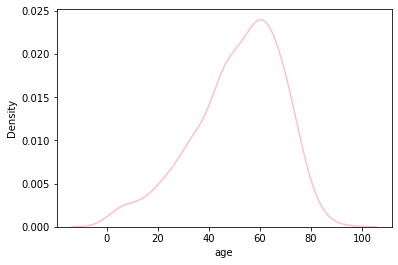

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


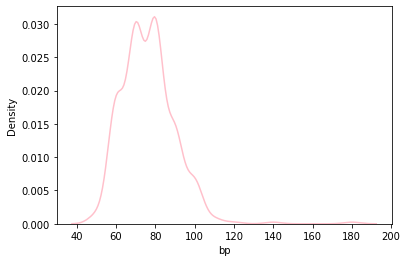

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


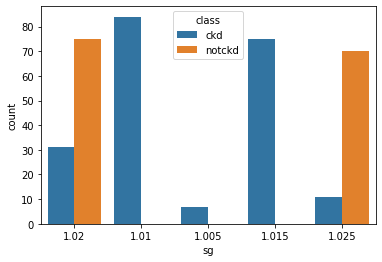

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


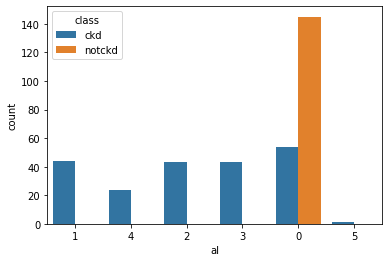

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


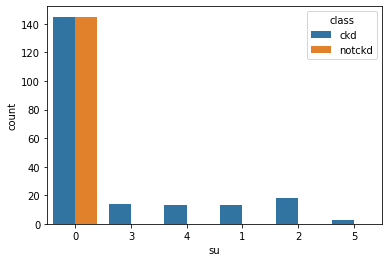

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


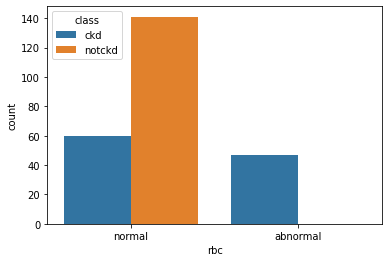

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


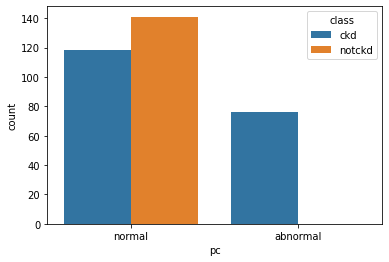

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


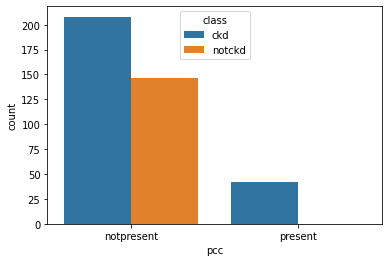

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


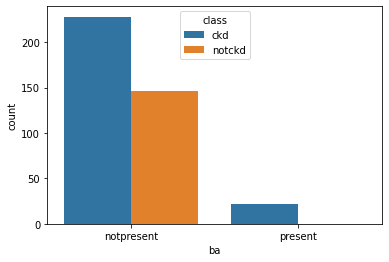

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


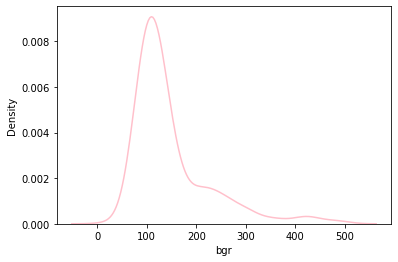

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


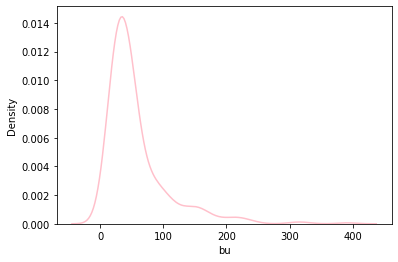

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


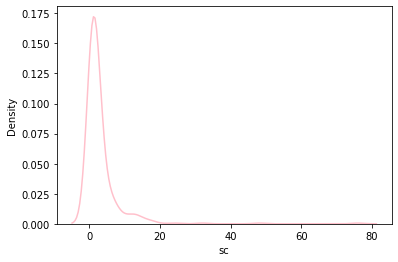

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


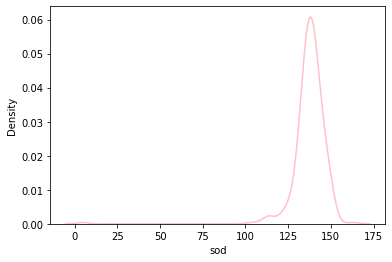

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


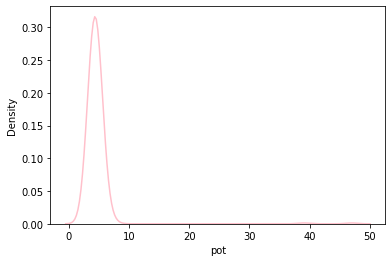

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


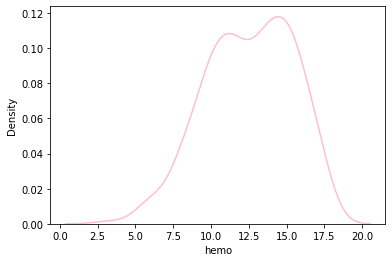

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


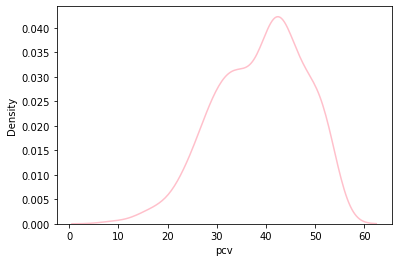

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


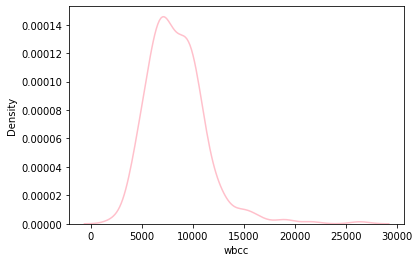

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


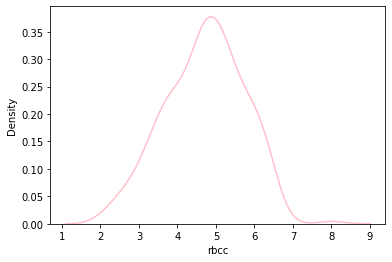

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


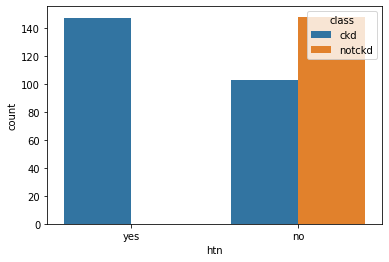

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


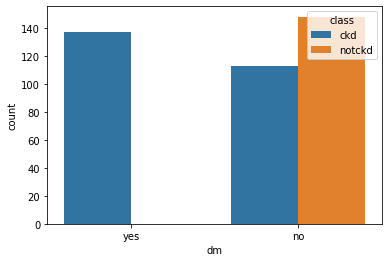

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


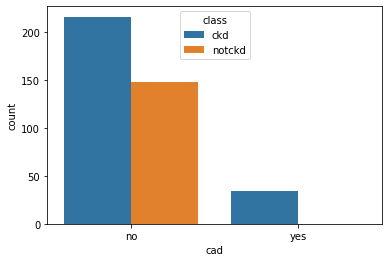

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


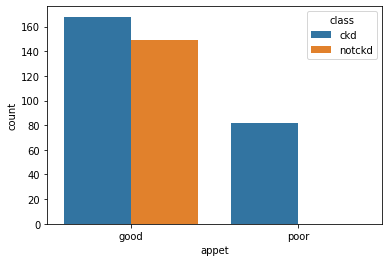

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


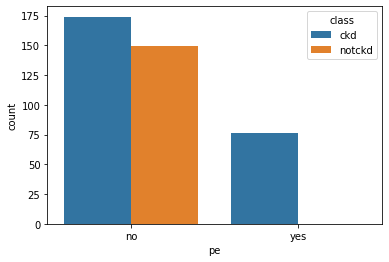

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


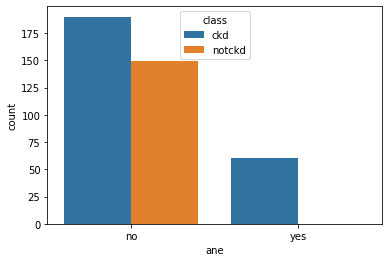

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


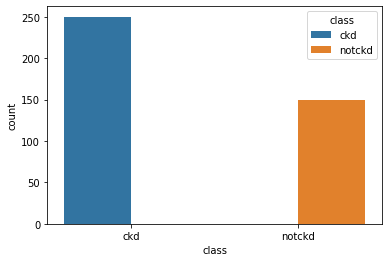

In [9]:
def showData(data):
    for col in data:
        if(col in nominalColumns):
            sea.countplot(col, data=data, hue='class')
        else:
            ax=sea.distplot(data[[col]],hist=False,color='pink')
            ax.set(xlabel=col)
        plt.show()
        
showData(data)


In [10]:
data.count()

age      391
bp       388
sg       353
al       354
su       351
rbc      248
pc       335
pcc      396
ba       396
bgr      356
bu       381
sc       383
sod      313
pot      312
hemo     348
pcv      329
wbcc     294
rbcc     269
htn      398
dm       398
cad      398
appet    399
pe       399
ane      399
class    400
dtype: int64

In [11]:
dataNotNan=data.dropna(axis=0)
dataNotNan.shape

(158, 25)

U konsultaciji sa lekarima dobili smo predlog da izbacimo sledece kolone wbcc i pcv naravno, ostace prvobitni dataset, zelimo samo da vidimo kako ce se ponasati skup

In [12]:
dataNotPCVNotWBCC=data.drop(axis=1,columns=['wbcc','pcv'])
dataNotPCVNotWBCC.shape

(400, 23)

Provera da li ima duplikata

In [13]:
data.drop_duplicates().shape

(400, 25)

In [14]:
def indicies_of_outliers(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    print( ( x > upper_bound) | (x < lower_bound))


indicies_of_outliers(data)

       age     al    ane  appet     ba    bgr     bp     bu    cad  class  \
0    False  False  False  False  False  False  False  False  False  False   
1     True  False  False  False  False  False   True  False  False  False   
2    False  False  False  False  False   True  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
395  False  False  False  False  False  False  False  False  False  False   
396  False  False  False  False  False  False  False  False  False  False   
397  False  False  False  False  False  False  False  False  False  False   
398  False  False  False  False  False  False  False  False  False  False   
399  False  False  False  False  False  False  False  False  False  False   

     ...    pcv     pe    pot    rbc   rbcc     sc     sg    sod     su   w

<ipython-input-14-29caa1d5b182>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print( ( x > upper_bound) | (x < lower_bound))
<ipython-input-14-29caa1d5b182>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print( ( x > upper_bound) | (x < lower_bound))


In [15]:
def removeOutliers(data):
    for ind,row in data.iterrows():
        for col in data:
            if(col not  in nominalColumns):
                Q1 = data[col].quantile(0.25)
                Q3 = data[col].quantile(0.75)
                IQR = Q3 - Q1
                if((row[col]< (Q1 - 1.5 * IQR))|(row[col] > (Q3 + 1.5 * IQR))):
                    data=data.drop([ind])
                    break


    return data
dataWoOutliers=removeOutliers(data)
dataWoOutliers

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.02,1,0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
4,51.0,80.0,1.01,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3,0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
12,68.0,70.0,1.015,3,1,NaN,normal,present,notpresent,208.0,...,28.0,12200.0,3.4,yes,yes,yes,poor,yes,no,ckd
13,68.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,98.0,...,NaN,NaN,NaN,yes,yes,yes,poor,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.02,0,0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0,0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.02,0,0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0,0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


Svi algoritmi rade samo sa numerickim vrednostima. Kreirali smo funkciju koja prevodi nominalni u numericki atribut

In [16]:
def nominalToNumeric(data):
    le = LabelEncoder()
    for col in nominalColumns:
        le.fit(data[col])
        data[col]=le.transform(data[col])
    return data

Funkcija koja unosi vrednosti na mestima gde nedostaju vrednosti odnosno NaN

In [17]:
def impute(data):
    imputedDataMean = pd.DataFrame()
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mostFrequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    for col in data:
        if (col in nominalColumns):
            imp_mostFrequent = imp_mostFrequent.fit(data[[col]])
            imputedDataMean[col] = imp_mostFrequent.transform(data[[col]]).ravel()

        else:
            imp_mean = imp_mean.fit(data[[col]])
            imputedDataMean[col] = imp_mean.transform(data[[col]]).ravel()
    return imputedDataMean

Dva skalera su implementirana

In [25]:
def MinMaxScale(data):
    for col in data:
        scale=MinMaxScaler(feature_range=(-1, 1))
        data = pd.DataFrame(scale.fit_transform(data.values), columns=data.columns, index=data.index)
    return data

def StandardScale(data):
    scale=StandardScaler()
    datapom=pd.DataFrame()
    clas = data['class']
    datapom = data.loc[:, data.columns != 'class']
    datapom = pd.DataFrame(scale.fit_transform(datapom.values), columns=datapom.columns, index=data.index)
    datapom['class'] = clas
    return datapom

## Klasifikacija
### Kreiranje i uporedjivanje klasifikatora

Naive Bayes

In [18]:
def Gaussan(data,name,visualize,t):
    Data = data.loc[:, data.columns != 'class']
    target = pd.DataFrame()
    target['class'] = data['class']
    data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=t, random_state=42,shuffle=True)
    gaus=GaussianNB()
    pred=gaus.fit(data_train,target_train).predict(data_test)
    print("Naive Bayes "+name+"  accuracy: ", accuracy_score(target_test,pred,normalize=True))
    print(classification_report(target_test,pred))
    if (visualize):

        plot_roc_curve(gaus, data_test, target_test)
        print(confusion_matrix(target_test,pred))
        plt.show()
    return {'Gaus':{'datatrain':data_train,'targettrain':target_train,'datatest':data_test,'targettest':target_test,'name':name}}


K Nearest Neighbours

In [19]:
def KNN(data,name,visualize,t):
    Data = data.loc[:, data.columns != 'class']
    target = pd.DataFrame()
    target['class'] = data['class']
    data_train, data_test, target_train, target_test = train_test_split(Data, target, test_size=t, random_state=42,shuffle=True)
    neigh=KNeighborsClassifier(n_neighbors=5)
    pred = neigh.fit(data_train, target_train).predict(data_test)
    print("KNN "+name+"  accuracy: ", accuracy_score(target_test, pred, normalize=True))
    print(classification_report(target_test, pred))
    if(visualize):
        plot_roc_curve(neigh,data_test,target_test)
        print(confusion_matrix(target_test, pred))
        plt.show()
    return {
        'KNN': {'datatrain': data_train, 'targettrain': target_train, 'datatest': data_test, 'targettest': target_test,
                 'name': name}}

Linearna Regresija

In [20]:
def LRegression(data,name,visualize,t):
    target = pd.DataFrame()
    target['class'] = data['class']
    Data = data.loc[:, data.columns != 'class']
    data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=t, random_state=42,
                                                                        shuffle=True)
    lr =LogisticRegression()
    pred = lr.fit(data_train, target_train).predict(data_test)
    print("Logistic Regression "+name+" accuracy: ", accuracy_score(target_test, pred, normalize=True))
    print(classification_report(target_test, pred))
    if (visualize):
        plot_roc_curve(lr, data_test, target_test)
        print(confusion_matrix(target_test, pred))
        plt.show()
    return {
        'LR': {'datatrain': data_train, 'targettrain': target_train, 'datatest': data_test, 'targettest': target_test,
                'name': name}}

Stablo odlucivanja

In [21]:
def DTree(data,name,visualize,t):
    Data = data.loc[:, data.columns != 'class']
    target = pd.DataFrame()
    target['class'] = data['class']
    data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=t, random_state=42,
                                                                        shuffle=True)
    dt = DecisionTreeClassifier(criterion='gini',max_depth=10)
    pred = dt.fit(data_train, target_train).predict(data_test)
    print("Decision tree"+name+" accuracy: ", accuracy_score(target_test, pred, normalize=True))
    print(classification_report(target_test, pred))
    if (visualize):
        plot_roc_curve(dt, data_test, target_test)
        print(confusion_matrix(target_test, pred))
        plt.show()
    return {
        'DT': {'datatrain': data_train, 'targettrain': target_train, 'datatest': data_test, 'targettest': target_test,
               'name': name}}


In [22]:
def callAllClassifiers(data,name,visualize,test):
    KNN(data,name,visualize,test)
    Gaussan(data,name,visualize,test)
    LRegression(data,name,visualize,test)
    DTree(data,name,visualize,test)


Krecemo da koristimo prethodno definisane funkcije

In [23]:
dataWoOutliers=impute(dataWoOutliers)
dataNotPCVNotWBCC=impute(dataNotPCVNotWBCC)
dataNotPCVNotWBCC=nominalToNumeric(dataNotPCVNotWBCC)
d1=pd.DataFrame()
d1=impute(data)
d1=nominalToNumeric(d1)
d1

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,3,4,0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,3,0,0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,4,0,0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,0,0,0,0,0,1
397,12.0,80.0,3,0,0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,4,0,0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,0,0,0,1


KNN Imputed data  accuracy:  0.7416666666666667
              precision    recall  f1-score   support

           0       0.91      0.66      0.76        76
           1       0.60      0.89      0.72        44

    accuracy                           0.74       120
   macro avg       0.75      0.77      0.74       120
weighted avg       0.80      0.74      0.75       120

[[50 26]
 [ 5 39]]


c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


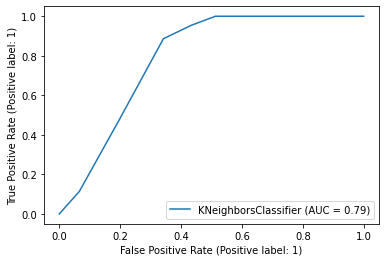

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Naive Bayes Imputed data  accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[76  0]
 [ 0 44]]


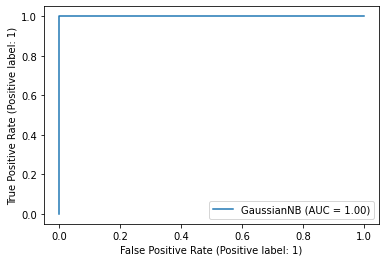

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Imputed data accuracy:  0.9333333333333333
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        76
           1       0.93      0.89      0.91        44

    accuracy                           0.93       120
   macro avg       0.93      0.92      0.93       120
weighted avg       0.93      0.93      0.93       120

[[73  3]
 [ 5 39]]


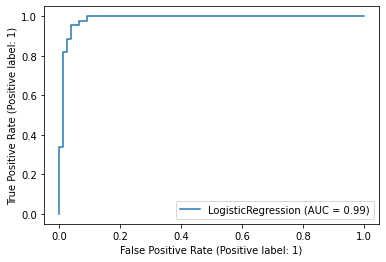

Decision treeImputed data accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[76  0]
 [ 0 44]]


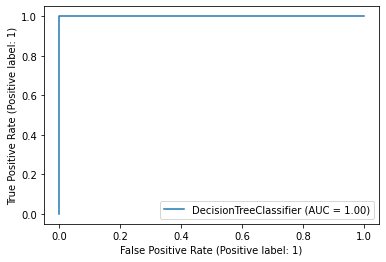

KNN Imputed data  accuracy:  0.725
              precision    recall  f1-score   support

           0       0.92      0.63      0.75        52
           1       0.57      0.89      0.69        28

    accuracy                           0.73        80
   macro avg       0.74      0.76      0.72        80
weighted avg       0.79      0.72      0.73        80

[[33 19]
 [ 3 25]]


c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


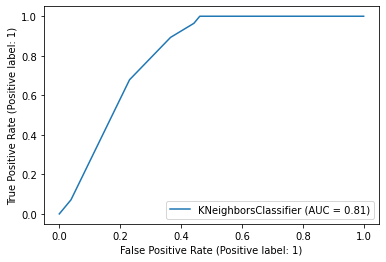

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Naive Bayes Imputed data  accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]


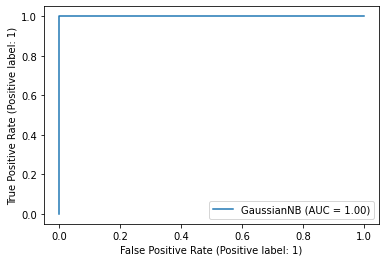

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Logistic Regression Imputed data accuracy:  0.95
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80

[[50  2]
 [ 2 26]]


c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


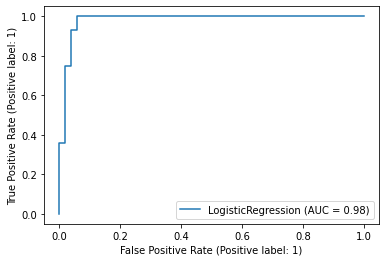

Decision treeImputed data accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]


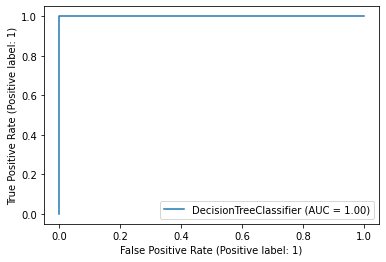

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarnin

KNN Min Max scale imuted Data  accuracy:  0.9916666666666667
              precision    recall  f1-score   support

        -1.0       1.00      0.99      0.99        76
         1.0       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Naive Bayes Min Max scale imuted Data  accuracy:  1.0
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Logistic Regression Min Max scale imuted Data accuracy:  1.0
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        76
         1.0       1.00      1.00      1.00        44

    ac

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbf

In [26]:
callAllClassifiers(d1,'Imputed data',True,0.3)
callAllClassifiers(d1,'Imputed data',True,0.2)
callAllClassifiers(MinMaxScale(d1),'Min Max scale imuted Data',False,0.3)
callAllClassifiers(StandardScale(d1),'Standard scale scale imuted Data',False,0.3)
callAllClassifiers(nominalToNumeric(dataWoOutliers),'data without outliers',False,0.3)
callAllClassifiers(dataNotPCVNotWBCC,'data without some columns',False,0.3)


Selekcija atributa

age      0.003911
bp       0.020534
sg       0.218193
al       0.046526
su       0.004580
rbc      0.022636
pc       0.031968
pcc      0.014433
ba       0.000838
bgr      0.037059
bu       0.013054
sc       0.013738
sod      0.005850
pot      0.005632
hemo     0.066716
pcv      0.049793
wbcc     0.003363
rbcc     0.038501
htn      0.140336
dm       0.122963
cad      0.000000
appet    0.064693
pe       0.056306
ane      0.018379
dtype: float64


<ipython-input-27-aa4910719b36>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(Data,target)


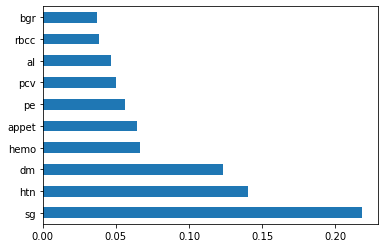

In [27]:
Data = d1.loc[:, d1.columns != 'class']
target = pd.DataFrame()
target['class'] = d1['class']
model=ExtraTreesClassifier(n_estimators=10)

model.fit(Data,target)

feat_importances = pd.Series(model.feature_importances_, index=Data.columns)
print(feat_importances)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Mozemo i isprobati ove atribute

KNN Obican samo sa Feature selectionom  accuracy:  0.975
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        76
           1       0.94      1.00      0.97        44

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

[[73  3]
 [ 0 44]]


c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


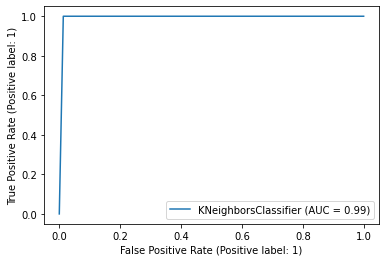

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Naive Bayes Obican samo sa Feature selectionom  accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[76  0]
 [ 0 44]]


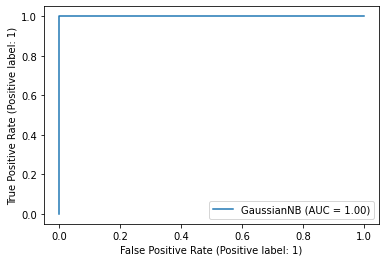

c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\joks\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Obican samo sa Feature selectionom accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[76  0]
 [ 0 44]]


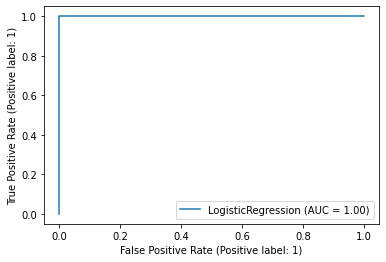

Decision treeObican samo sa Feature selectionom accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[76  0]
 [ 0 44]]


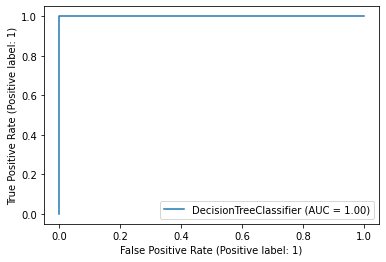

In [28]:
callAllClassifiers(d1[['hemo','htn','sg','al','dm','rbcc','pcv','appet','rbc','pcc','class']],'Obican samo sa Feature selectionom',True,0.3)
